<a href="https://colab.research.google.com/github/HimanshuSahoo/Himanshu_Python/blob/main/Assignment_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("SalaryData_Test.csv")

In [4]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [7]:
df.shape

(15060, 14)

In [8]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [11]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


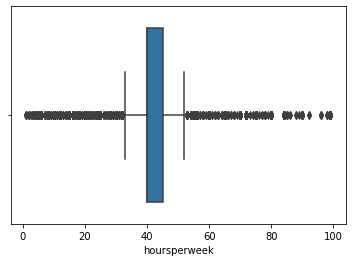

In [12]:
sns.boxplot("hoursperweek",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


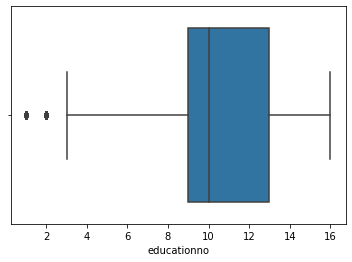

In [13]:
sns.boxplot("educationno",data=df)

In [14]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['maritalstatus']=le.fit_transform(df['maritalstatus'])
df['occupation']=le.fit_transform(df['occupation'])
df['relationship']=le.fit_transform(df['relationship'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['native']=le.fit_transform(df['native'])
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [15]:

x=df.iloc[:,:13]
y=df.iloc[:,-1]

In [16]:
from sklearn import preprocessing
#normalize data
x=preprocessing.StandardScaler().fit_transform(x)
x[0:13]

array([[-1.02900513, -0.222347  , -2.42343884, -1.2165628 ,  0.93318745,
         0.00272543,  1.00610775, -2.03438913,  0.69583225, -0.14543845,
        -0.2191694 , -0.07888904,  0.26058067],
       [-0.05742253, -0.222347  ,  0.19017232, -0.43489824, -0.39546327,
        -0.49478949, -0.88198978,  0.38223023,  0.69583225, -0.14543845,
        -0.2191694 ,  0.75013125,  0.26058067],
       [-0.80479376, -1.25712632, -0.85527215,  0.73759862, -0.39546327,
         0.99775528, -0.88198978,  0.38223023,  0.69583225, -0.14543845,
        -0.2191694 , -0.07888904,  0.26058067],
       [ 0.39100021, -0.222347  ,  1.23561678, -0.04406595, -0.39546327,
         0.00272543, -0.88198978, -2.03438913,  0.69583225,  0.85262384,
        -0.2191694 , -0.07888904,  0.26058067],
       [-0.35637102, -0.222347  , -2.68479996, -1.60739509,  0.93318745,
         0.25148289, -0.25262394,  0.38223023,  0.69583225, -0.14543845,
        -0.2191694 , -0.90790934,  0.26058067],
       [ 1.81100556,  1.847211

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
y_test.shape

(4518,)

In [18]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [19]:
BernNB=BernoulliNB(binarize=True)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect=y_test

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


In [20]:
y_pred=BernNB.predict(x_test)

In [21]:
y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [22]:

accuracy_score(y_expect,y_pred)

0.7656042496679947

In [23]:
GausNB=GaussianNB()
GausNB.fit(x_train,y_train)
y_pred=GausNB.predict(x_test)
accuracy_score(y_expect,y_pred)

0.8012394864984507

In [24]:
y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [25]:

BernNB=BernoulliNB(binarize=0.1)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect=y_test

y_pred=BernNB.predict(x_test)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)


In [26]:
accuracy_score(y_expect,y_pred)

0.7841965471447543

In [27]:
df2=pd.read_csv("SalaryData_Train.csv")

In [28]:
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


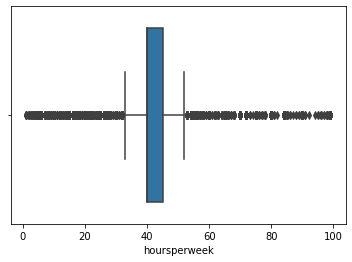

In [43]:
sns.boxplot("hoursperweek",data=df2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


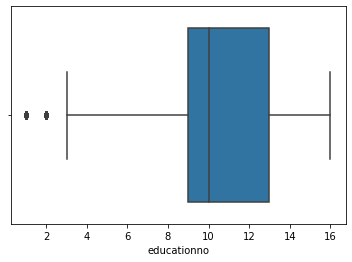

In [44]:
sns.boxplot("educationno",data=df2)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  int64 
 2   education      15060 non-null  int64 
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  int64 
 5   occupation     15060 non-null  int64 
 6   relationship   15060 non-null  int64 
 7   race           15060 non-null  int64 
 8   sex            15060 non-null  int64 
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  int64 
 13  Salary         15060 non-null  object
dtypes: int64(13), object(1)
memory usage: 1.6+ MB


In [30]:
df.shape

(15060, 14)

In [31]:
df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,10.272377,10.112749,2.595286,5.989044,1.401394,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596
std,13.380676,0.966422,3.826251,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['workclass']=le.fit_transform(df2['workclass'])
df2['education']=le.fit_transform(df2['education'])
df2['maritalstatus']=le.fit_transform(df2['maritalstatus'])
df2['occupation']=le.fit_transform(df2['occupation'])
df2['relationship']=le.fit_transform(df2['relationship'])
df2['race']=le.fit_transform(df2['race'])
df2['sex']=le.fit_transform(df2['sex'])
df2['native']=le.fit_transform(df2['native'])
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [33]:
x=df2.iloc[:,:13]
y=df2.iloc[:,-1]

In [34]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
y_test.shape

(9049,)

In [36]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [37]:
BernNB=BernoulliNB(binarize=True)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect=y_test

y_pred=BernNB.predict(x_test)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


In [38]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [39]:
accuracy_score(y_expect,y_pred)

0.778649574538623

In [40]:
GausNB=GaussianNB()
GausNB.fit(x_train,y_train)
y_pred=GausNB.predict(x_test)
accuracy_score(y_expect,y_pred)

0.7898110288429661

In [41]:

BernNB=BernoulliNB(binarize=0.1)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect=y_test

y_pred=BernNB.predict(x_test)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)


In [42]:
accuracy_score(y_expect,y_pred)

0.7232843408111393